# Regression example

by Ola Johansson

This notebook walks through the regression exercise from the course MA213A.

In [3]:
#Read the data set
import pandas as pd
df = pd.read_excel('Cars-all.xlsx')
print(str(df.shape[0])+' rows')
df.head(3)


884 rows


,Make,Model,Doors,Seats,SeatsMin,SeatsMax,Dimensions,Length,Width,Height,...,MaxTorque,Drive,FrontWheelDrive,RearWheelDrive,Gears,Automatic,Acceleration,MaxSpeed,FuelConsumption,CO2
0,Alfa Romeo,Giulia 2.0 Turbo,4.0,5.0,5,5,4650x1860x1438,4650.0,1860.0,1438.0,...,400.0,Rear wheel drive,Not front wheel drive,Rear wheel drive,8.0,Automatic gearbox,5.7,240.0,6.4 S,195
1,Alfa Romeo,Giulia 2.0 Turbo,4.0,5.0,5,5,4643x1860x1438,4643.0,1860.0,1438.0,...,330.0,Rear wheel drive,Not front wheel drive,Rear wheel drive,8.0,Automatic gearbox,6.6,235.0,6.3 S,171
2,Alfa Romeo,Giulia 2.0 Turbo Q4,4.0,5.0,5,5,4650x1860x1438,4650.0,1860.0,1438.0,...,400.0,All wheel drive,Front wheel drive,Rear wheel drive,8.0,Automatic gearbox,5.2,240.0,6.8 S,189


# Predicting MaxSpeed

Let's add some advanced feature engineering... according to the second law of Newton, F=m*a, the ratio between the mass (weight) and the force (here assumed to be correlated with the power of the engine) should be a good predictor of the acceleration.

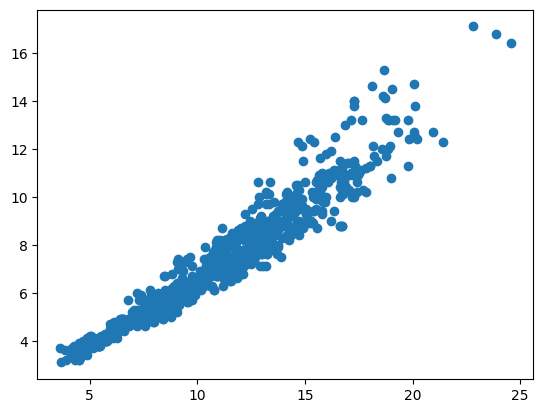

In [5]:
df['NewtonPredict'] = df['Weight'] / df['MaxPower']
import matplotlib.pyplot as plt
plt.scatter(df['NewtonPredict'], df['Acceleration'])
plt.show() 

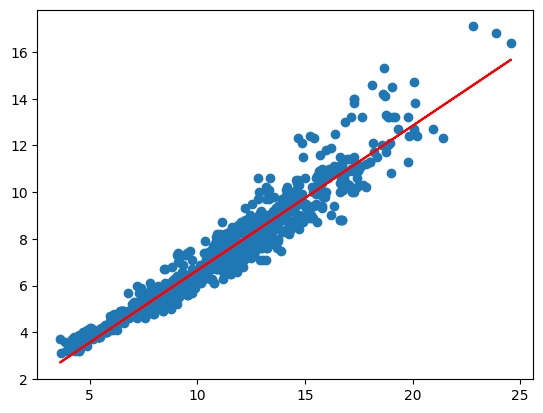

y-hat=0.462+0.619*x
R-sq=0.925
MAE=0.474 (Mean Absolute Error)
MAPE=6.222% (Mean Absolute Percentage Error)
MSE=0.436 (Mean Squared Error)
RMSE=0.660 (Root Mean Squared Error)
MEDAE=0.351 (Median Absolute Error)
MDAPE=5.046% (Median Absolute Percentage Error)


In [6]:
#Add linear regression for acceleration
import numpy as np
from sklearn.linear_model import LinearRegression
df2=df.dropna(subset=['NewtonPredict', 'Acceleration']) #Dropping NaN values (otherwise the regression will fail)
X = df2['NewtonPredict'].values.reshape(df2.shape[0], 1) #Reshape the columns for the regression
y = df2['Acceleration'].values.reshape(df2.shape[0], 1)
regr = LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)  
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show() 

#Print model and error metrics
print(f'y-hat={regr.intercept_[0]:.3f}+{regr.coef_[0][0]:.3f}*x') if regr.coef_[0][0]>0 else print(f'y-hat={regr.intercept_[0]:.3f}{regr.coef_[0][0]:.3f}*x')
print(f'R-sq={regr.score(X,y):.3f}')
MAE = np.mean(abs(y_pred - y)) 
MAPE = np.mean((np.abs(y_pred - y) / y)) * 100
MSE = np.square(np.subtract(y_pred, y)).mean()
RMSE = np.sqrt(np.mean(np.square(y_pred - y)))
MEDAE = np.median(abs(y_pred - y))
MDAPE = np.median((np.abs(np.subtract(y, y_pred)/ y))) * 100
print(f'MAE={MAE:.3f} (Mean Absolute Error)')
print(f'MAPE={MAPE:.3f}% (Mean Absolute Percentage Error)')
print(f'MSE={MSE:.3f} (Mean Squared Error)')
print(f'RMSE={RMSE:.3f} (Root Mean Squared Error)')
print(f'MEDAE={MEDAE:.3f} (Median Absolute Error)')
print(f'MDAPE={MDAPE:.3f}% (Median Absolute Percentage Error)')

# Predicting MaxSpeed

More advanced feature engineering... Under the assumption that the fluid is not moving relative to the currently used reference system, the power required to overcome the aerodynamic drag is given by: 

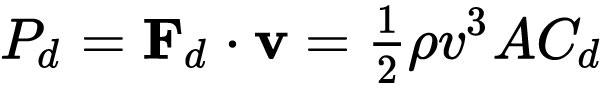


By removing unknowns and rearranging the formula, we get v=((Power / Cross section area)^(1/3)

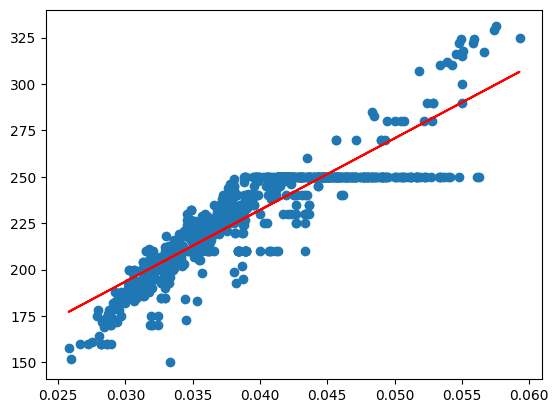

y-hat=77.770+3859.680*x
R-sq=0.781
MAE=10.228 (Mean Absolute Error)
MAPE=4.538% (Mean Absolute Percentage Error)
MSE=167.375 (Mean Squared Error)
RMSE=12.937 (Root Mean Squared Error)
MEDAE=8.748 (Median Absolute Error)
MDAPE=3.828% (Median Absolute Percentage Error)


In [7]:
#Add linear regression for MaxSpeed
df['AeroDynamicsPredict'] = (df['MaxPower'] / (df['Width'] * df['Height']))**(1/3)
df2=df.dropna(subset=['AeroDynamicsPredict', 'MaxSpeed']) #Dropping NaN values (otherwise the regression will fail)
X = df2['AeroDynamicsPredict'].values.reshape(df2.shape[0], 1) #Reshape the columns for the regression
y = df2['MaxSpeed'].values.reshape(df2.shape[0], 1)
regr = LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)  
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show() 

#Print model and error metrics
print(f'y-hat={regr.intercept_[0]:.3f}+{regr.coef_[0][0]:.3f}*x') if regr.coef_[0][0]>0 else print(f'y-hat={regr.intercept_[0]:.3f}{regr.coef_[0][0]:.3f}*x')
print(f'R-sq={regr.score(X,y):.3f}')
MAE = np.mean(abs(y_pred - y)) 
MAPE = np.mean((np.abs(y_pred - y) / y)) * 100
MSE = np.square(np.subtract(y_pred, y)).mean()
RMSE = np.sqrt(np.mean(np.square(y_pred - y)))
MEDAE = np.median(abs(y_pred - y))
MDAPE = np.median((np.abs(np.subtract(y, y_pred)/ y))) * 100
print(f'MAE={MAE:.3f} (Mean Absolute Error)')
print(f'MAPE={MAPE:.3f}% (Mean Absolute Percentage Error)')
print(f'MSE={MSE:.3f} (Mean Squared Error)')
print(f'RMSE={RMSE:.3f} (Root Mean Squared Error)')
print(f'MEDAE={MEDAE:.3f} (Median Absolute Error)')
print(f'MDAPE={MDAPE:.3f}% (Median Absolute Percentage Error)')

There is a odd looking line of observations with a top speed of 250 km/h. These are likly cars which are electronically controlled to a max speed of 250 km/h. Without this limitation, the engine would be powerful enough to reach higher velocities.

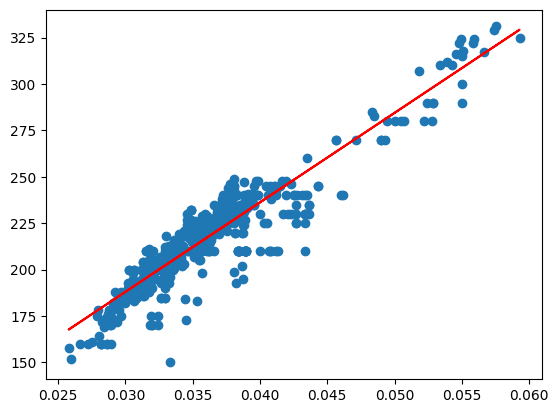

y-hat=43.413+4821.118*x
R-sq=0.842
MAE=8.604 (Mean Absolute Error)
MAPE=4.017% (Mean Absolute Percentage Error)
MSE=126.519 (Mean Squared Error)
RMSE=11.248 (Root Mean Squared Error)
MEDAE=6.891 (Median Absolute Error)
MDAPE=3.052% (Median Absolute Percentage Error)


In [8]:
#Add linear regression for MaxSpeed without MaxSpeed=250 km/h
df2 = df2[df2.MaxSpeed != 250]
X = df2['AeroDynamicsPredict'].values.reshape(df2.shape[0], 1) #Reshape the columns for the regression
y = df2['MaxSpeed'].values.reshape(df2.shape[0], 1)
regr = LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)  
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show() 

#Print model and error metrics
print(f'y-hat={regr.intercept_[0]:.3f}+{regr.coef_[0][0]:.3f}*x') if regr.coef_[0][0]>0 else print(f'y-hat={regr.intercept_[0]:.3f}{regr.coef_[0][0]:.3f}*x')
print(f'R-sq={regr.score(X,y):.3f}')
MAE = np.mean(abs(y_pred - y)) 
MAPE = np.mean((np.abs(y_pred - y) / y)) * 100
MSE = np.square(np.subtract(y_pred, y)).mean()
RMSE = np.sqrt(np.mean(np.square(y_pred - y)))
MEDAE = np.median(abs(y_pred - y))
MDAPE = np.median((np.abs(np.subtract(y, y_pred)/ y))) * 100
print(f'MAE={MAE:.3f} (Mean Absolute Error)')
print(f'MAPE={MAPE:.3f}% (Mean Absolute Percentage Error)')
print(f'MSE={MSE:.3f} (Mean Squared Error)')
print(f'RMSE={RMSE:.3f} (Root Mean Squared Error)')
print(f'MEDAE={MEDAE:.3f} (Median Absolute Error)')
print(f'MDAPE={MDAPE:.3f}% (Median Absolute Percentage Error)')

# Multiple linear regression



In [9]:
import pandas as pd
df = pd.read_excel('Cars-all.xlsx')

df=df[['Length','Width','Height','Weight','MaxPower','MaxTorque','Drive','Gears','Automatic','Acceleration','MaxSpeed','CO2']]
df=df.dropna(how='any') #Drop any observation where a row contains NaN

dfX=df[['Length','Width','Height','Weight','MaxPower','MaxTorque','Drive','Gears','Automatic']]
dfX=pd.get_dummies(dfX)
dfX

,Length,Width,Height,Weight,MaxPower,MaxTorque,Gears,Drive_8,Drive_All wheel drive,Drive_Front wheem drive,Drive_Rear wheel drive,Automatic_Automatic gearbox,Automatic_Manual gearbox
0,4650.0,1860.0,1438.0,1504.0,206,400.0,8.0,False,False,False,True,True,False
1,4643.0,1860.0,1438.0,1504.0,147,330.0,8.0,False,False,False,True,True,False
2,4650.0,1860.0,1438.0,1605.0,206,400.0,8.0,False,True,False,False,True,False
3,4643.0,1860.0,1438.0,1540.0,140,450.0,8.0,False,False,False,True,True,False
4,4650.0,1860.0,1438.0,1615.0,154,470.0,8.0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,5309.0,1920.0,1890.0,1770.0,130,400.0,8.0,False,False,True,False,True,False
878,5309.0,1920.0,1890.0,1770.0,106,340.0,6.0,False,False,True,False,False,True
880,4379.0,1854.0,1292.0,1395.0,190,400.0,8.0,False,False,False,True,True,False
881,4379.0,1854.0,1292.0,1570.0,250,500.0,8.0,False,False,False,True,True,False


In [10]:
X = dfX.values.reshape(dfX.shape[0], dfX.shape[1])

y_acc = df['Acceleration'].values.reshape(df.shape[0], 1)
y_speed = df['MaxSpeed'].values.reshape(df.shape[0], 1)
y_co2 = df['CO2'].values.reshape(df.shape[0], 1)

y=y_acc

regr = LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)  

print(f'R-sq={regr.score(X,y):.3f}')
MAE = np.mean(abs(y_pred - y)) 
MAPE = np.mean((np.abs(y_pred - y) / y)) * 100
MSE = np.square(np.subtract(y_pred, y)).mean()
RMSE = np.sqrt(np.mean(np.square(y_pred - y)))
MEDAE = np.median(abs(y_pred - y))
MDAPE = np.median((np.abs(np.subtract(y, y_pred)/ y))) * 100
print(f'MAE={MAE:.3f} (Mean Absolute Error)')
print(f'MAPE={MAPE:.3f}% (Mean Absolute Percentage Error)')
print(f'MSE={MSE:.3f} (Mean Squared Error)')
print(f'RMSE={RMSE:.3f} (Root Mean Squared Error)')
print(f'MEDAE={MEDAE:.3f} (Median Absolute Error)')
print(f'MDAPE={MDAPE:.3f}% (Median Absolute Percentage Error)')

print('Intercept: ', regr.intercept_)
print('Coefficients: ',regr.coef_)

R-sq=0.855
MAE=0.654 (Mean Absolute Error)
MAPE=9.192% (Mean Absolute Percentage Error)
MSE=0.849 (Mean Squared Error)
RMSE=0.921 (Root Mean Squared Error)
MEDAE=0.470 (Median Absolute Error)
MDAPE=6.884% (Median Absolute Percentage Error)
Intercept:  [7.6276111]
Coefficients:  [[-2.22899630e-04 -2.27461149e-04  2.61454741e-03  1.28522783e-03
  -1.40751912e-02 -2.85216781e-03 -1.12704457e-01  2.26280197e-02
  -3.88134820e-01  4.51881458e-01 -8.63746575e-02 -6.51200880e-01
   6.51200880e-01]]
